## Carbon-di-oxide Emissions Forecasting

In this project, we create a Season Autoregressive Integrated Moving Average(SARIMA) model using the following datasource i.e., the csv file and calculate its predictive power along with predicting the carbon-di-oxide emissions for 10 years.

In [1]:
# importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading the data and storing it in a dataframe
data = pd.read_csv("Co2_Emissions.csv")

### Exploratory Data Analysis

In [3]:
data.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,197301,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,197302,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,197303,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,197304,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,197305,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [4]:
# retrieving the type of data in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   YYYYMM        5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


In [5]:
# retrieving the summary of the data in the dataframe
data.describe()

,YYYYMM,Column_Order
count,5094.000000,5094.000000
mean,199434.171378,5.000000
std,1257.074138,2.582242
min,197301.000000,1.000000
25%,198312.000000,3.000000
50%,199410.500000,5.000000
75%,200509.000000,7.000000
max,201607.000000,9.000000


In [6]:
# renaming the YYYYMM column to Date
data = data.rename(columns = {'YYYYMM':'Date'})

In [7]:
# converting the integer type date to datetime.
data['Date'] = pd.to_datetime(data['Date'], format = '%Y%m', errors='coerce')

In [8]:
# replacing inappropriate data with null values
data['Value'] = data['Value'].replace('Not Available', np.nan)
data['Value'] = data['Value'].astype(float)

In [9]:
# checking for missing data
data.isna().sum()

MSN               0
Date            387
Value           416
Column_Order      0
Description       0
Unit              0
dtype: int64

In [10]:
null_date_rows = data[data['Date'].isnull()]
null_date_rows

,MSN,Date,Value,Column_Order,Description,Unit
12,CLEIEUS,NaT,811.791,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
25,CLEIEUS,NaT,800.131,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
38,CLEIEUS,NaT,823.740,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
51,CLEIEUS,NaT,911.346,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
64,CLEIEUS,NaT,962.143,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
...,...,...,...,...,...,...
5034,TXEIEUS,NaT,2169.731,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5047,TXEIEUS,NaT,2034.367,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5060,TXEIEUS,NaT,2049.895,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5073,TXEIEUS,NaT,2049.902,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [11]:
# dropping the date columns with null values
data = data.dropna(subset = ['Date'])
data = data.reset_index(drop=True)

In [12]:
# checking for missing values
data.isna().sum()

MSN               0
Date              0
Value           384
Column_Order      0
Description       0
Unit              0
dtype: int64

In [13]:
# dropping instances with null values
data = data.dropna()

In [14]:
data = data.reset_index(drop = True)
data

,MSN,Date,Value,Column_Order,Description,Unit
0,CLEIEUS,1973-01-01,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,1973-02-01,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,1973-03-01,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,1973-04-01,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,1973-05-01,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
...,...,...,...,...,...,...
4318,TXEIEUS,2016-03-01,115.997,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4319,TXEIEUS,2016-04-01,113.815,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4320,TXEIEUS,2016-05-01,129.440,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4321,TXEIEUS,2016-06-01,172.074,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [15]:
data.isna().sum()

MSN             0
Date            0
Value           0
Column_Order    0
Description     0
Unit            0
dtype: int64

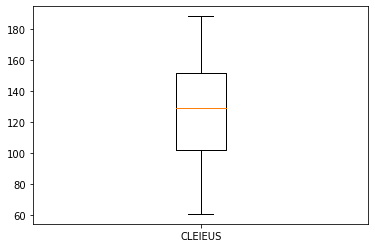

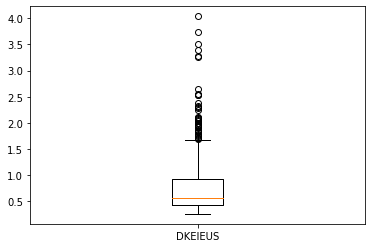

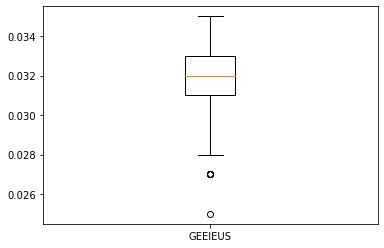

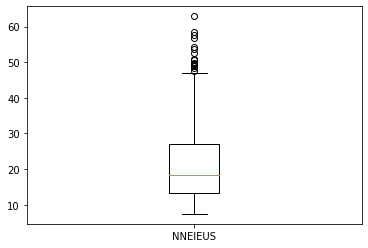

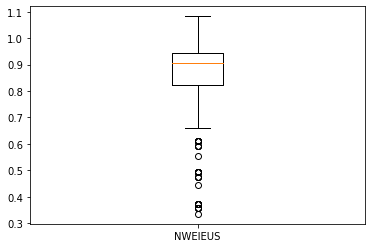

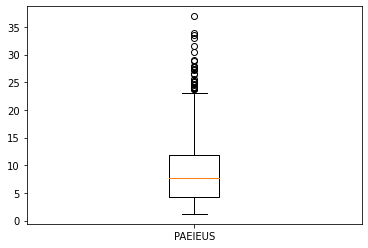

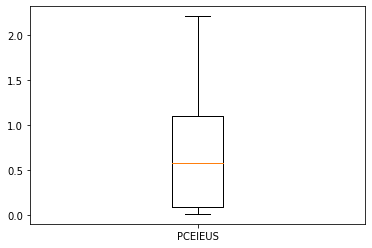

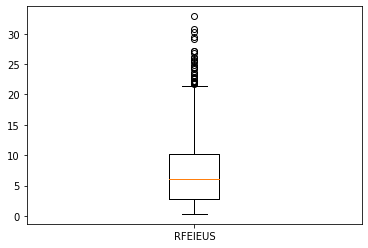

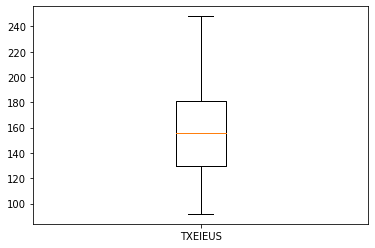

In [16]:
grouped = data.groupby('MSN')

# plot a boxplot for each group
for name, group in grouped:
    plt.boxplot(group['Value'], labels=[name])
    plt.show()

We can see there are outliers to the data but there is no conclusive evidence to prove that they are outliers and they should be removed or treated. So we are not changing anything.

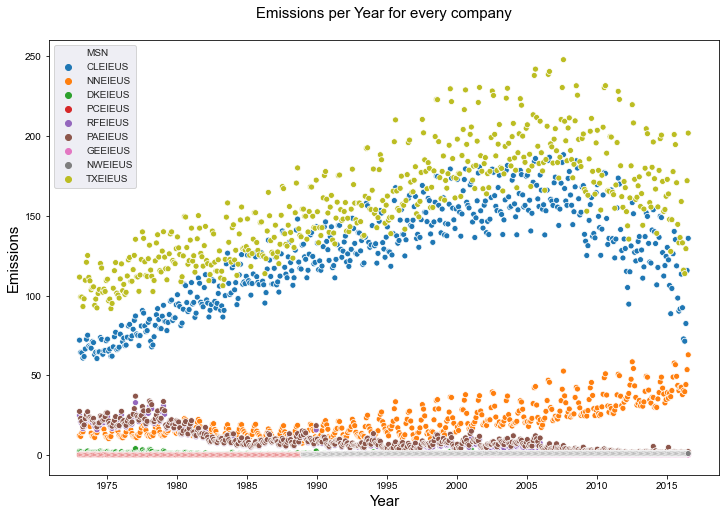

<Figure size 1800x1440 with 0 Axes>

In [17]:
#creating a scatterplot of emissions over time for every MSN
import seaborn as sns

fig, ax = plt.subplots(figsize = (12,8))
sns.set_style("darkgrid")
sns.scatterplot(x="Date", y="Value", hue="MSN", data=data)
plt.figure(figsize=(25, 20))

ax.set_xlabel("Year",fontsize = 15)
ax.set_ylabel("Emissions",fontsize = 15)
ax.set_title("Emissions per Year for every company\n",fontsize = 15)

plt.show()

Creating the SARIMA model to predict the emissions of CO2 levels from Natural Gas Electric Power Sector CO2 Emissions

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from itertools import product

In [19]:
# fetching the Natural Gas Electric Powe Sector data from the dataframe
natural_emissions = data[data['Description'] == 'Natural Gas Electric Power Sector CO2 Emissions']
natural_gas_emissions = natural_emissions[['Date','Value']]
natural_gas_emissions

,Date,Value
523,1973-01-01,12.175
524,1973-02-01,11.708
525,1973-03-01,13.994
526,1973-04-01,14.627
527,1973-05-01,17.344
...,...,...
1041,2016-03-01,40.525
1042,2016-04-01,39.763
1043,2016-05-01,44.210
1044,2016-06-01,53.567


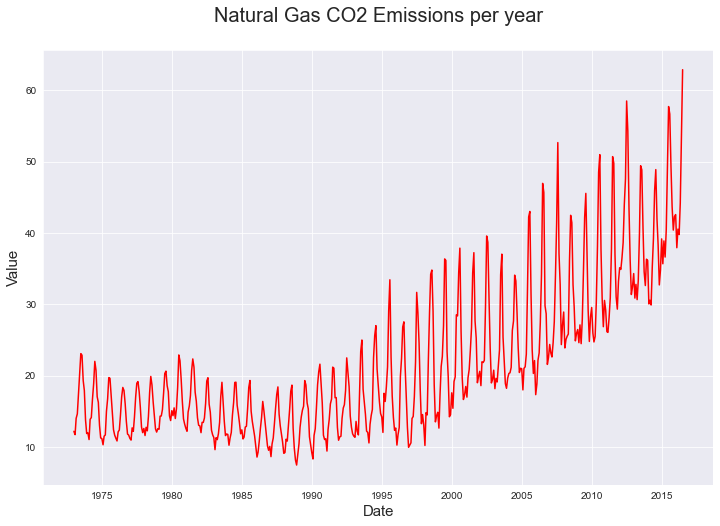

In [20]:
#plotting a lineplot
fig, ax = plt.subplots(figsize=(12, 8))

# Assuming your DataFrame is called df
sns.set_style("darkgrid")

# Plot a line graph for each company's value per date
sns.lineplot(x="Date", y="Value", data=natural_gas_emissions,color = 'r')

# Set x-axis label
ax.set_xlabel("Date",fontsize = 15)

# Set y-axis label
ax.set_ylabel("Value",fontsize = 15)

# Set title
ax.set_title("Natural Gas CO2 Emissions per year\n",fontsize = 20)

# Show the plot
plt.show()

Before creating the arima model, we have to check if the data is stationary or not. To check for stationarity, we are using Augmented-Dickey-Fuller Test. In Augmented-Dickey-Fuller test, the p-value of the time series should be less than 0.05 to conclude that the data is stationary. If it is more than 0.05, we have to attain stationarity for the time series

In [21]:
from statsmodels.tsa.stattools import adfuller
natural_gas_emissions1 = natural_gas_emissions['Value'].values
statistical_result = adfuller(natural_gas_emissions1)
print('ADF Statistic:', statistical_result[0])
print('p-value:', statistical_result[1])
print('Number of lags used:', statistical_result[2])
print('Number of observations used:',statistical_result[3])
print('Critical Values:')
for key, value in statistical_result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 1.8312146208181261
p-value: 0.9984089578807271
Number of lags used: 19
Number of observations used: 503
Critical Values:
	1%: -3.4434175660489905
	5%: -2.8673031724657454
	10%: -2.5698395516760275


Since the p-value of this time series data (0.9984089578807271) is more than 0.05, this data is not stationary. To make this data stationary, we have many techniques like Seasonal decomposition, moving average, differencing, etc. 

#### Using Differencing to attain stationarity

In [22]:
natural_gas_emissions_first_difference = natural_gas_emissions - natural_gas_emissions.shift(1)
natural_gas_emissions_first_difference = natural_gas_emissions_first_difference.dropna()

natural_gas_emissions_seasonal_first_difference = natural_gas_emissions_first_difference - natural_gas_emissions_first_difference.shift(12)
natural_gas_emissions_seasonal_first_difference = natural_gas_emissions_first_difference.dropna()
natural_gas_emissions_seasonal_first_difference

,Date,Value
524,31 days,-0.467
525,28 days,2.286
526,31 days,0.633
527,30 days,2.717
528,31 days,2.921
...,...,...
1041,29 days,2.607
1042,31 days,-0.762
1043,30 days,4.447
1044,31 days,9.357


In [23]:
natural_gas_emissions_seasonal_first_difference1 = natural_gas_emissions_seasonal_first_difference['Value'].values
statistical_result = adfuller(natural_gas_emissions_seasonal_first_difference1)
print('ADF Statistic:', statistical_result[0])
print('p-value:', statistical_result[1])
print('Number of lags used:', statistical_result[2])
print('Number of observations used:',statistical_result[3])
print('Critical Values:')
for key, value in statistical_result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -5.435115663120988
p-value: 2.8570111116581273e-06
Number of lags used: 18
Number of observations used: 503
Critical Values:
	1%: -3.4434175660489905
	5%: -2.8673031724657454
	10%: -2.5698395516760275


Since the p-value (2.8570111116581273e-06) is less than 0.05, we can conclude that the data is stationary.

Plotting Autocorrelation function (ACF) and Partial Autocorrelation Function(PACF) to find the optimal parameters for SARIMA model

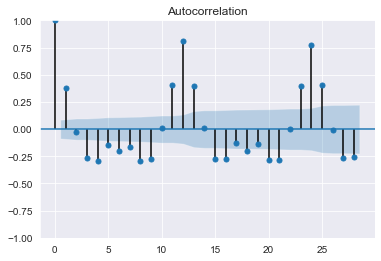

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


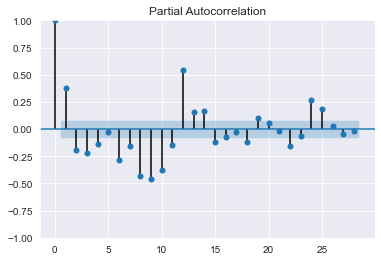

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# plot ACF
plot_acf(natural_gas_emissions_seasonal_first_difference['Value'])
plt.show()

# plot PACF
plot_pacf(natural_gas_emissions_seasonal_first_difference['Value'])
plt.show()

In [25]:
natural_gas_emissions_diff = natural_gas_emissions_seasonal_first_difference.reset_index(drop = True)
natural_gas_emissions_diff[470:]

,Date,Value
470,31 days,2.170
471,30 days,5.296
472,31 days,3.650
473,30 days,10.918
474,31 days,-4.208
475,31 days,-10.898
476,30 days,-7.208
477,31 days,-4.821
478,30 days,1.079
479,31 days,1.860


Using grid search to select the best order and seasonal order for the SARIMA model to build the optimal model.

In [26]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
best_aic = 9999
best_params = (999,999,999)
best_seasonal_params = (999,999,999)
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            model = SARIMAX(natural_gas_emissions_diff['Value'],order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = model.fit()
            if(results.aic < best_aic):
                best_aic = results.aic
                best_params = param
                best_seasonal_params = seasonal_param
        except:
            continue
print('The optimal parameters for the SARIMAX model is',best_params, best_seasonal_params, best_aic)

The optimal parameters for the SARIMAX model is (1, 0, 1) (0, 1, 1, 12) 2003.856317756792


In [27]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

train_size = round(0.9 * len(natural_gas_emissions_diff))

train_data = natural_gas_emissions_diff[:train_size]
test_data = natural_gas_emissions_diff[train_size:]

# Define the SARIMAX model
model = SARIMAX(train_data['Value'], order=best_params,seasonal_order=best_seasonal_params)
results = model.fit()

# Predict on the test data
test_data['Value_predicted'] = results.predict(start=test_data.index.min(), end=test_data.index.max())

# Evaluate the predictions
mse = mean_squared_error(test_data['Value'],test_data['Value_predicted'])
mae = mean_absolute_error(test_data['Value'],test_data['Value_predicted'])
print("Mean Square Error of the data is ", mse)
print("Mean Absolute Error of the data is ", mae)

Mean Square Error of the data is  5.073625416487619
Mean Absolute Error of the data is  1.8364831121493563


<ipython-input-27-b4aafdf36c23>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Value_predicted'] = results.predict(start=test_data.index.min(), end=test_data.index.max())


In [28]:
# forecasting for the next 10 years
n_periods = (12 * 10) + round(0.1*len(natural_gas_emissions_diff))
pred_diff = results.forecast(steps=n_periods)
pred_diff = pred_diff.iloc[52:]
pred_diff

522     1.407321
523   -11.779856
524    -5.793656
525    -3.918152
526     2.856023
         ...    
637     0.891269
638    -0.097599
639     2.687539
640     6.942328
641     9.804201
Name: predicted_mean, Length: 120, dtype: float64

In [29]:
natural_gas_emissions = natural_gas_emissions.reset_index(drop = True)
natural_gas_emissions_with_predictions = natural_gas_emissions.loc[:, ['Date','Value']]
print(natural_gas_emissions_with_predictions)

          Date   Value
0   1973-01-01  12.175
1   1973-02-01  11.708
2   1973-03-01  13.994
3   1973-04-01  14.627
4   1973-05-01  17.344
..         ...     ...
518 2016-03-01  40.525
519 2016-04-01  39.763
520 2016-05-01  44.210
521 2016-06-01  53.567
522 2016-07-01  62.881

[523 rows x 2 columns]


In [30]:
# getting back the undifferenced data along with its predictions 
for i in range(0,120):
    value = natural_gas_emissions_with_predictions.iloc[-1]['Value'] + round(pred_diff.iloc[i],5)
    date = natural_gas_emissions_with_predictions.iloc[-1]['Date']
    next_month = date + pd.DateOffset(months=1)
    natural_gas_emissions_with_predictions.loc[len(natural_gas_emissions_with_predictions)+i] = [next_month,value]

In [31]:
natural_gas_emissions_with_predictions = natural_gas_emissions_with_predictions.reset_index(drop = True)
natural_gas_emissions_with_predictions

,Date,Value
0,1973-01-01,12.17500
1,1973-02-01,11.70800
2,1973-03-01,13.99400
3,1973-04-01,14.62700
4,1973-05-01,17.34400
...,...,...
638,2026-03-01,60.73403
639,2026-04-01,60.63643
640,2026-05-01,63.32397
641,2026-06-01,70.26630


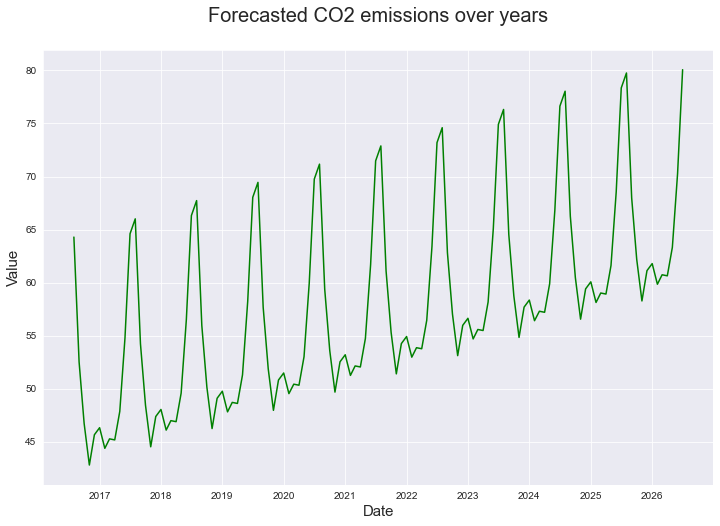

In [32]:
forecasted_data = natural_gas_emissions_with_predictions.tail(120)

#plotting a lineplot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot a line graph for each company's value per date
sns.lineplot(x="Date", y="Value", data=forecasted_data, color = 'g')

# Set x-axis label
ax.set_xlabel("Date",fontsize = 15)

# Set y-axis label
ax.set_ylabel("Value",fontsize = 15)

# Set title
ax.set_title("Forecasted CO2 emissions over years\n",fontsize = 20)

# Show the plot
plt.show()

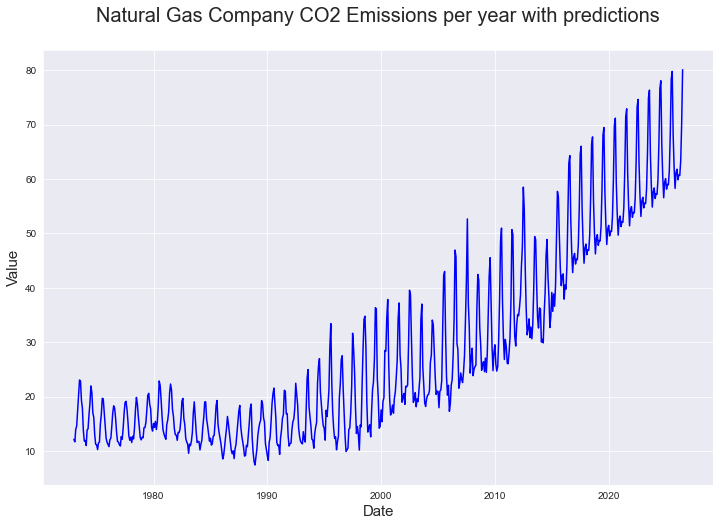

In [33]:
#plotting a lineplot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot a line graph for each company's value per date
sns.lineplot(x="Date", y="Value", data=natural_gas_emissions_with_predictions, color = 'b')

# Set x-axis label
ax.set_xlabel("Date",fontsize = 15)

# Set y-axis label
ax.set_ylabel("Value",fontsize = 15)

# Set title
ax.set_title("Natural Gas Company CO2 Emissions per year with predictions\n",fontsize = 20)

# Show the plot
plt.show()

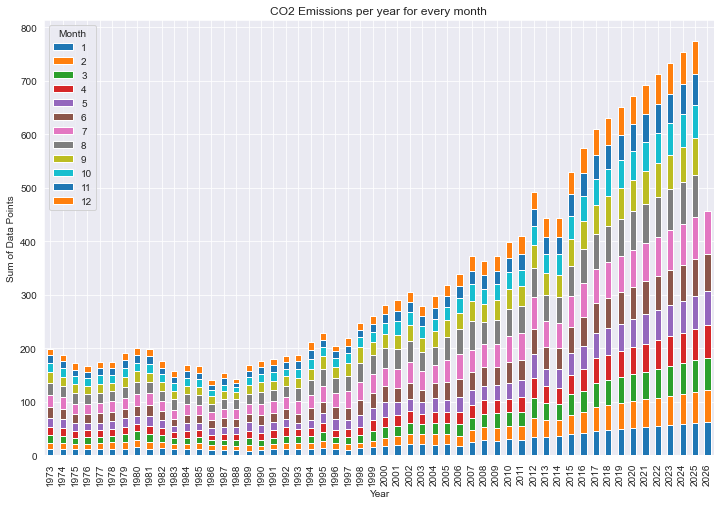

In [34]:
# Add year column
natural_gas_emissions_with_predictions['year'] = natural_gas_emissions_with_predictions['Date'].dt.year

# Group by year and month and calculate sum of data points
grouped_data = natural_gas_emissions_with_predictions.groupby(['year', natural_gas_emissions_with_predictions['Date'].dt.month])['Value'].sum()

# Pivot the resulting DataFrame
pivoted_data = grouped_data.unstack()

# Plot the pivoted DataFrame
pivoted_data.plot(kind='bar', stacked=True,figsize = (12,8))

# Add axis labels and legend
plt.xlabel('Year')
plt.ylabel('Sum of Data Points')
plt.legend(title='Month')
plt.title('CO2 Emissions per year for every month')

# Show the plot
plt.show()